Привет, меня зовут Артем Хуршудов. Сегодня я проверю твой проект.
<br> Дальнейшее общение будет происходить на "ты" если это не вызывает никаких проблем.
<br> Желательно реагировать на каждый мой комментарий ('исправил', 'не понятно как исправить ошибку', ...)
<br> Пожалуйста, не удаляй комментарии ревьюера, так как они повышают качество повторного ревью.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:

<div class="alert alert-block alert-success">
<b>Успех:</b> Если все сделано отлично
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Если требуются исправления. Работа не может быть принята с красными комментариями.
</div>

-------------------

Будет очень хорошо, если ты будешь помечать свои действия следующим образом:
<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> ...
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Были внесены следующие изменения ...
</div>

#### <font color='orange'>Полезные ссылки:</font>
* Полезная лекция про временные ряды: https://www.youtube.com/watch?v=u433nrxdf5k .

### <font color='orange'>Общее впечатление</font>
* Большое спасибо за проделанную работу. Видно, что приложено много усилий.
* Отлично, что ноутбук хорошо структурирован. Приятно проверять такие работы.
* Над этим проектом нужно будет еще немного поработать. Однако, изменения не должны занять много времени.
* В работе я оставил несколько советов. Буду рад, если ты учтешь их.
* С радостью отвечу на твои вопросы, если они есть. Лучше всего их собрать в следующей ячейке. Жду новую версию проекта.

### <font color='orange'>Общее впечатление (ревью 2)</font>
* Для удобства все новые комментарии обозначены фразой "ревью 2".
* Удачи в доработке!

### <font color='orange'>Общее впечатление (ревью 3)</font>
* После исправлений проект улучшился и теперь он может быть зачтен.
* Предела увеличения лага – нет, но в какой-то момент качество начнет ухудшаться. Можешь подобрать его на кросс-валидации.
* Удачи в дальнейшем обучении и следующих работах!

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Полезные-ссылки:" data-toc-modified-id="Полезные-ссылки:-0.0.1"><span class="toc-item-num">0.0.1&nbsp;&nbsp;</span><font color="orange">Полезные ссылки:</font></a></span></li></ul></li><li><span><a href="#Общее-впечатление" data-toc-modified-id="Общее-впечатление-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span><font color="orange">Общее впечатление</font></a></span></li><li><span><a href="#Общее-впечатление-(ревью-2)" data-toc-modified-id="Общее-впечатление-(ревью-2)-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span><font color="orange">Общее впечатление (ревью 2)</font></a></span></li><li><span><a href="#Общее-впечатление-(ревью-3)" data-toc-modified-id="Общее-впечатление-(ревью-3)-0.3"><span class="toc-item-num">0.3&nbsp;&nbsp;</span><font color="orange">Общее впечатление (ревью 3)</font></a></span></li></ul></li><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение</a></span></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Тестирование</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Вам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

## Подготовка

In [1]:
import pandas as pd
import numpy as np
import time
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from catboost import CatBoostRegressor
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import TimeSeriesSplit

<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично, что все импорты собраны в первой ячейке ноутбука! Если у того, кто будет запускать твой ноутбук будут отсутствовать некоторые библиотеки, то он это увидит сразу, а не в процессе!
</div>

In [2]:
data = pd.read_csv('/datasets/taxi.csv', parse_dates =[0], index_col=[0])

<div class="alert alert-info">
<font color='black'> <b> Сделаем даты индексами таблицы и преобразуем даты в объект "DateTime"</font> <b>

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


In [4]:
data.index.is_monotonic

True

<div class="alert alert-info">
<font color='black'> <b> Проверим на монотонность дат. Столбец с датой является монотонным </font> <b>

In [5]:
data.head(15)

num_orders
datetime                       
2018-03-01 00:00:00           9
2018-03-01 00:10:00          14
2018-03-01 00:20:00          28
2018-03-01 00:30:00          20
2018-03-01 00:40:00          32
2018-03-01 00:50:00          21
2018-03-01 01:00:00           7
2018-03-01 01:10:00           5
2018-03-01 01:20:00          17
2018-03-01 01:30:00          12
2018-03-01 01:40:00          19
2018-03-01 01:50:00          25
2018-03-01 02:00:00          22
2018-03-01 02:10:00          12
2018-03-01 02:20:00          19

In [6]:
data = data.resample("1H").sum()

<div class="alert alert-info">
<font color='black'> <b> Сделаем разбивку не по 10 мин, а по одному часу </font> <b>

In [7]:
data.head(15)

num_orders
datetime                       
2018-03-01 00:00:00         124
2018-03-01 01:00:00          85
2018-03-01 02:00:00          71
2018-03-01 03:00:00          66
2018-03-01 04:00:00          43
2018-03-01 05:00:00           6
2018-03-01 06:00:00          12
2018-03-01 07:00:00          15
2018-03-01 08:00:00          34
2018-03-01 09:00:00          69
2018-03-01 10:00:00          64
2018-03-01 11:00:00          96
2018-03-01 12:00:00          30
2018-03-01 13:00:00          32
2018-03-01 14:00:00          48

In [8]:
data.plot(figsize=(16, 10))

<AxesSubplot:xlabel='datetime'>

In [9]:
data["rolling_mean"] = data["num_orders"].rolling(50).mean()

<AxesSubplot:xlabel='datetime'>

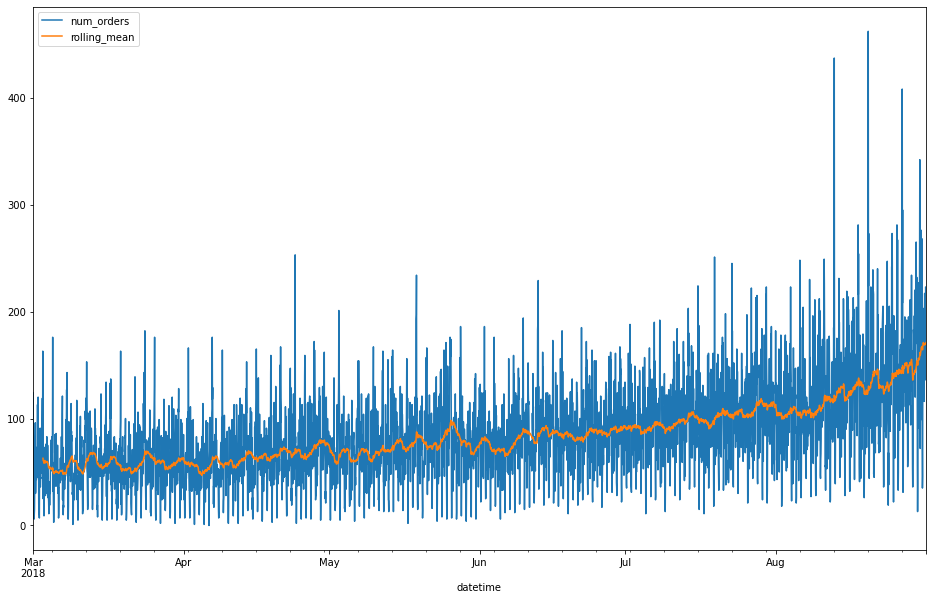

In [10]:
data.plot(figsize=(16, 10))

<div class="alert alert-block alert-success">
<b>Успех:</b> Данные загружены корректно, первичный осмотр проведен. Ресемплинг был сделан верно.
</div>

In [11]:
data_dif = data - data.shift()

In [12]:
data_dif.plot(figsize=(16, 10))

<AxesSubplot:xlabel='datetime'>

<div class="alert alert-info">
<font color='black'> <b> Построим график с разностью исходного временного ряда. Можем видеть, что ряд у нас стационарный (разность практически не меняется)</font> <b>

In [13]:
def make_features(data, max_lag, rolling_mean_size):
    data['year'] = data.index.year
    data['month'] = data.index.month
    data['day'] = data.index.day
    data['dayofweek'] = data.index.dayofweek
    
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)

    data['rolling_mean'] = data['num_orders'].shift().rolling(rolling_mean_size).mean()

<div class="alert alert-block alert-info">
<b>Совет: </b> Желательно было написать функцию таким образом, чтобы она возвращала новый датафрейм, а не изменяла глобальную переменную.
</div>

<div class="alert alert-info">
<font color='black'> <b> Создадим признаки</font> <b>

In [14]:
make_features(data,70,19)

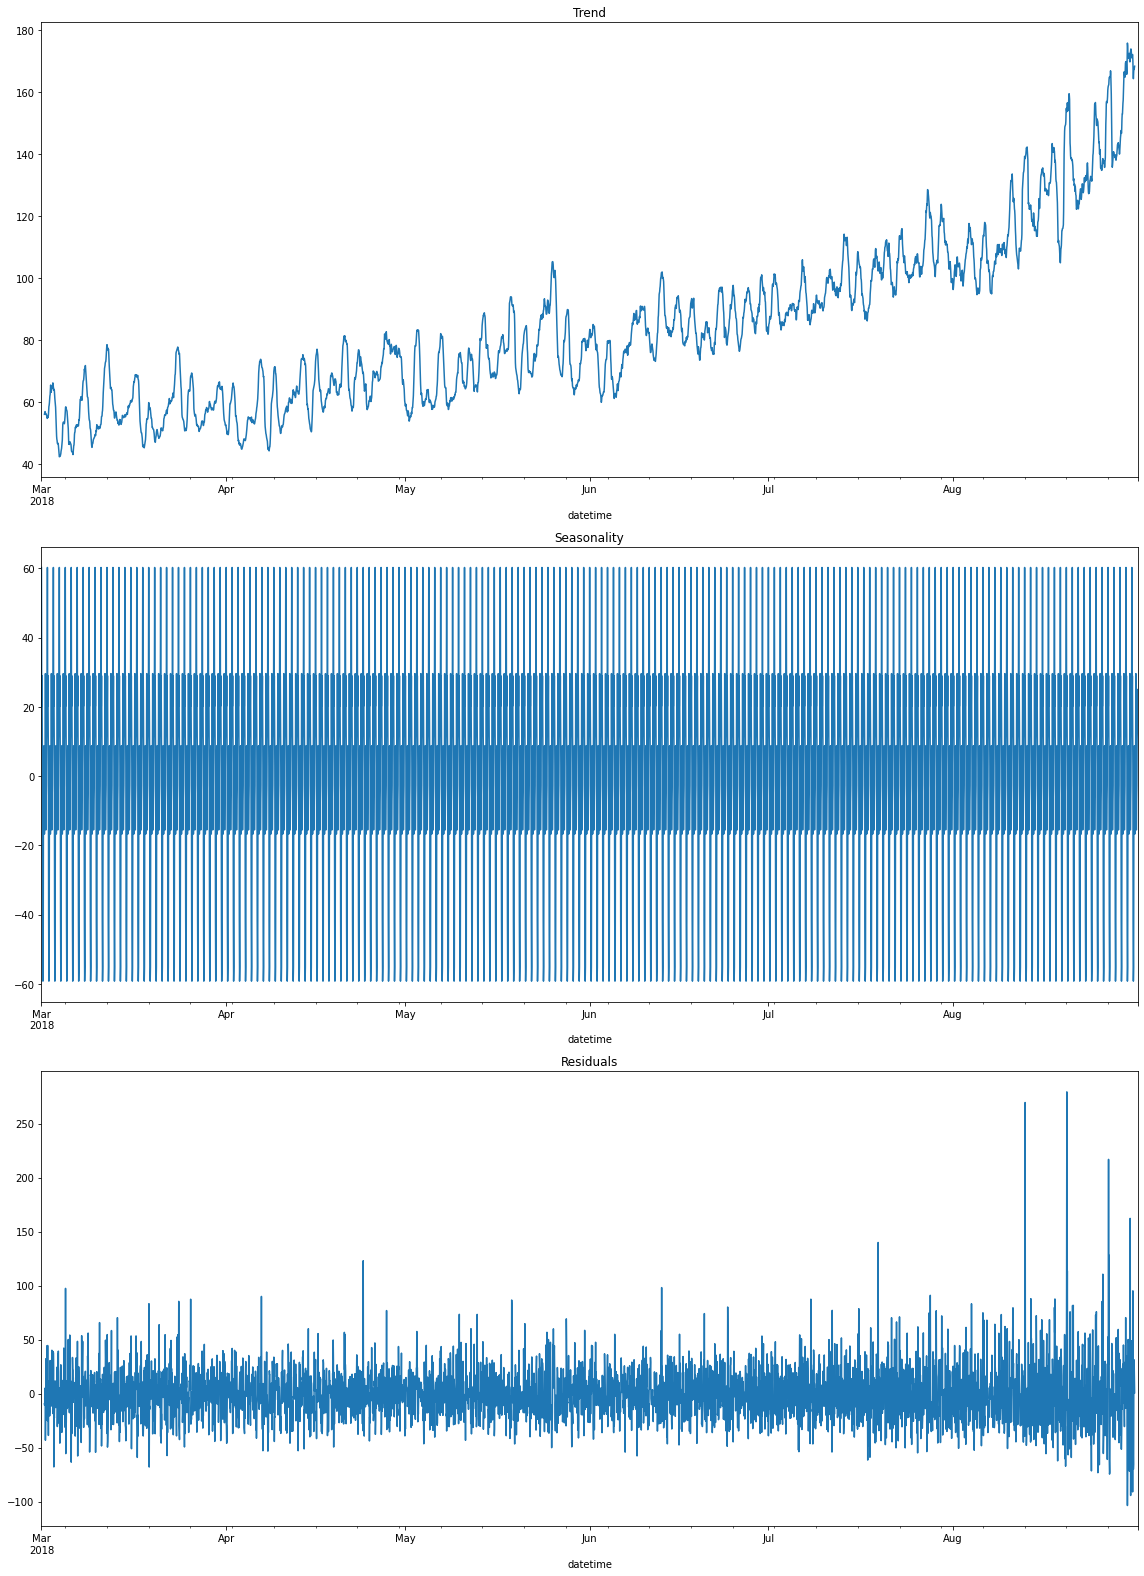

In [15]:
decomposed = seasonal_decompose(data['num_orders']) 

plt.figure(figsize=(16, 22))
plt.subplot(311)
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca()) 
plt.title('Seasonality')
plt.subplot(313)
decomposed.resid.plot(ax=plt.gca()) 
plt.title('Residuals')
plt.tight_layout()



In [16]:
decomposed_short = seasonal_decompose(data['num_orders']["2018-04-01":"2018-04-08"])
plt.figure(figsize=(16, 22))
plt.subplot(311)
decomposed_short.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(312)
decomposed_short.seasonal.plot(ax=plt.gca()) 
plt.title('Seasonality')
plt.subplot(313)
decomposed_short.resid.plot(ax=plt.gca()) 
plt.title('Residuals')
plt.tight_layout()

<div class="alert alert-info">
<font color='black'> <b> Разобьем данные на трендовые и сезонные. Видно, что в августе имеется повышенный спрос по сравнению с весной. Сезонная компонента практически не меняется. Также при рассмотрении недельного графика видно, что спрос высок в понедельник, потом снижается и снова растет к концу недели</font> <b>

In [17]:
display (data.head(15))

num_orders  rolling_mean  year  month  day  dayofweek  \
datetime                                                                     
2018-03-01 00:00:00         124           NaN  2018      3    1          3   
2018-03-01 01:00:00          85           NaN  2018      3    1          3   
2018-03-01 02:00:00          71           NaN  2018      3    1          3   
2018-03-01 03:00:00          66           NaN  2018      3    1          3   
2018-03-01 04:00:00          43           NaN  2018      3    1          3   
2018-03-01 05:00:00           6           NaN  2018      3    1          3   
2018-03-01 06:00:00          12           NaN  2018      3    1          3   
2018-03-01 07:00:00          15           NaN  2018      3    1          3   
2018-03-01 08:00:00          34           NaN  2018      3    1          3   
2018-03-01 09:00:00          69           NaN  2018      3    1          3   
2018-03-01 10:00:00          64           NaN  2018      3    1          3   
2018-03-01 11:00:00          96           NaN  2018      3    1          3   
2018-03-01 12:00:00          30           NaN  2018      3    1          3   
2018-03-01 13:00:00          32           NaN  2018      3    1          3   
2018-03-01 14:00:00          48           NaN  2018      3    1          3   

                     lag_1  lag_2  lag_3  lag_4  ...  lag_61  lag_62  lag_63  \
datetime                                         ...                           
2018-03-01 00:00:00    NaN    NaN    NaN    NaN  ...     NaN     NaN     NaN   
2018-03-01 01:00:00  124.0    NaN    NaN    NaN  ...     NaN     NaN     NaN   
2018-03-01 02:00:00   85.0  124.0    NaN    NaN  ...     NaN     NaN     NaN   
2018-03-01 03:00:00   71.0   85.0  124.0    NaN  ...     NaN     NaN     NaN   
2018-03-01 04:00:00   66.0   71.0   85.0  124.0  ...     NaN     NaN     NaN   
2018-03-01 05:00:00   43.0   66.0   71.0   85.0  ...     NaN     NaN     NaN   
2018-03-01 06:00:00    6.0   43.0   66.0   71.0  ...     NaN     NaN     NaN   
2018-03-01 07:00:00   12.0    6.0   43.0   66.0  ...     NaN     NaN     NaN   
2018-03-01 08:00:00   15.0   12.0    6.0   43.0  ...     NaN     NaN     NaN   
2018-03-01 09:00:00   34.0   15.0   12.0    6.0  ...     NaN     NaN     NaN   
2018-03-01 10:00:00   69.0   34.0   15.0   12.0  ...     NaN     NaN     NaN   
2018-03-01 11:00:00   64.0   69.0   34.0   15.0  ...     NaN     NaN     NaN   
2018-03-01 12:00:00   96.0   64.0   69.0   34.0  ...     NaN     NaN     NaN   
2018-03-01 13:00:00   30.0   96.0   64.0   69.0  ...     NaN     NaN     NaN   
2018-03-01 14:00:00   32.0   30.0   96.0   64.0  ...     NaN     NaN     NaN   

                     lag_64  lag_65  lag_66  lag_67  lag_68  lag_69  lag_70  
datetime                                                                     
2018-03-01 00:00:00     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
2018-03-01 01:00:00     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
2018-03-01 02:00:00     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
2018-03-01 03:00:00     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
2018-03-01 04:00:00     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
2018-03-01 05:00:00     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
2018-03-01 06:00:00     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
2018-03-01 07:00:00     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
2018-03-01 08:00:00     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
2018-03-01 09:00:00     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
2018-03-01 10:00:00     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
2018-03-01 11:00:00     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
2018-03-01 12:00:00     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
2018-03-01 13:00:00     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
2018-03-01 14:00:00     NaN     NaN     NaN     NaN     NaN     NaN     NaN  

[15 ro

<div class="alert alert-block alert-success">
<b>Успех:</b> Декомпозиция была сделана верно. 
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Однако, желательно чтобы сезонность была визуализирована на более коротком интервале!
<div class="alert alert-info"> <b>Комментарий студента:</b> Сделал</div>
</div>

<div class="alert alert-block alert-info">

<b>Совет (ревью 2): </b> Лучше было сделать так: `decomposed_short = seasonal_decompose(data['num_orders'])["2018-04-01":"2018-04-08"]`.
</div>

## Обучение

In [18]:
train,test = train_test_split(data,shuffle = False, random_state = 12345, test_size = 0.2)
valid,test = train_test_split(test,shuffle = False, random_state = 12345, test_size = 0.5)

train = train.dropna()

features_train=train.drop('num_orders',axis = 1)
features_val=valid.drop('num_orders',axis = 1)
features_test=test.drop('num_orders',axis = 1)

target_train=train['num_orders']
target_val=valid['num_orders']
target_test=test['num_orders']

<div class="alert alert-info">
<font color='black'> <b> Разобьем данные на тренировочные, валидационные и тестовые выборки</font> <b>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Размер теста должен быть равен 10% – это требование заказчика.
<div class="alert alert-info"> <b>Комментарий студента:</b> Сделал</div>


<div class="alert alert-block alert-success">
<b>Успех (ревью 2):</b> ОК.
</div>

In [19]:
%%time
model = CatBoostRegressor(loss_function='RMSE', iterations=50)
splits = TimeSeriesSplit(n_splits=5)
parameters_cat = {'depth':list(range(5, 12))}
grid_m = GridSearchCV(estimator=model, param_grid = parameters_cat, cv = splits, n_jobs=-1, verbose=10)
grid_m.fit(features_train, target_train)
params = grid_m.best_params_
catboost_best = CatBoostRegressor(**params, random_state=12345)
catboost_best.fit(features_train, target_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV 1/5; 1/7] START depth=5.....................................................
Learning rate set to 0.428729
0:	learn: 24.8841992	total: 54.1ms	remaining: 2.65s
1:	learn: 22.2905855	total: 59.3ms	remaining: 1.42s
2:	learn: 20.6983279	total: 64.2ms	remaining: 1s
3:	learn: 19.7607607	total: 69.2ms	remaining: 796ms
4:	learn: 18.6177075	total: 74ms	remaining: 666ms
5:	learn: 17.9904603	total: 79.3ms	remaining: 582ms
6:	learn: 17.3230617	total: 85.9ms	remaining: 528ms
7:	learn: 16.9993612	total: 93.3ms	remaining: 490ms
8:	learn: 16.4211552	total: 102ms	remaining: 463ms
9:	learn: 15.8085990	total: 110ms	remaining: 439ms
10:	learn: 15.2776545	total: 119ms	remaining: 420ms
11:	learn: 14.7851501	total: 127ms	remaining: 403ms
12:	learn: 14.4481418	total: 133ms	remaining: 379ms
13:	learn: 14.1905026	total: 138ms	remaining: 355ms
14:	learn: 13.9142881	total: 143ms	remaining: 334ms
15:	learn: 13.5630560	total: 148ms	remaining: 314ms
16:	

<div class="alert alert-info">
<font color='black'> <b> Обучим модель с помощью CatBoostRegressor, подберем гиперпараметры</font> <b>

<div class="alert alert-block alert-info">
<b>Совет: </b> При подборе параметров с помощью кросс-валидации можно вообще не выделять треин.
</div>

<div class="alert alert-block alert-info">
<b>Совет (ревью 2): </b> В комментарии выше последнее слово должно было быть "valid", а не "треин".
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> При работе с временными рядами нельзя использовать стандартную кросс-валидацию, так как в определенный момент тренировочная выборка окажется позже валидационной. Для решения этой проблемы стоит использовать <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html">TimeSeriesSplit</a>. Объект этого типа можно передать в параметр cv в метод основанный на кросс-валидации.
<div class="alert alert-info"> <b>Комментарий студента:</b> Сделал</div>
</div>

<div class="alert alert-block alert-success">
<b>Успех (ревью 2):</b> Верно.
</div>

In [20]:
display (params)

{'depth': 5}

<div class="alert alert-info">
<font color='black'> <b> Нашли лучшие гиперпараметры для CatBoostRegressor  </font> <b>

In [21]:
%%time
model_rf = RandomForestRegressor(random_state=12345)
parameters_rf = {"max_depth": list(range(4, 8))}
rf_grid = GridSearchCV(estimator=model_rf, param_grid = parameters_rf, cv = splits, n_jobs=-1, verbose=10)
rf_grid.fit(features_train, target_train)
params_rf = rf_grid.best_params_
rf_best = RandomForestRegressor(**params_rf, random_state=12345)
rf_best.fit(features_train, target_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5; 1/4] START max_depth=4.................................................
[CV 1/5; 1/4] END ...............................max_depth=4; total time=   0.7s
[CV 2/5; 1/4] START max_depth=4.................................................
[CV 2/5; 1/4] END ...............................max_depth=4; total time=   1.3s
[CV 3/5; 1/4] START max_depth=4.................................................
[CV 3/5; 1/4] END ...............................max_depth=4; total time=   1.8s
[CV 4/5; 1/4] START max_depth=4.................................................
[CV 4/5; 1/4] END ...............................max_depth=4; total time=   2.4s
[CV 5/5; 1/4] START max_depth=4.................................................
[CV 5/5; 1/4] END ...............................max_depth=4; total time=   3.0s
[CV 1/5; 2/4] START max_depth=5.................................................
[CV 1/5; 2/4] END ...............................

RandomForestRegressor(max_depth=7, random_state=12345)

<div class="alert alert-info">
<font color='black'> <b> Обучим модель с помощью RandomForestRegressor, подберем гиперпараметры</font> <b>

In [22]:
display (params_rf)

{'max_depth': 7}

<div class="alert alert-info">
<font color='black'> <b> Нашли лучшие гиперпараметры для RandomForestRegressor  </font> <b>

In [23]:
%%time
lgb_train = lgb.Dataset(features_train, target_train)
lgb_val = lgb.Dataset(features_val, target_val)
parameters_lgb = {'max_depth':10,'random_state': 12345}
model_lgb = lgb.train( parameters_lgb,
                    train_set=lgb_train, valid_sets=(lgb_train, lgb_val),
                    num_boost_round=100, verbose_eval=10)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


/opt/conda/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.196551 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12599
[LightGBM] [Info] Number of data points in the train set: 3462, number of used features: 74
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Start training from score 74.638937
[10]	training's l2: 502.55	valid_1's l2: 1628.2
[20]	training's l2: 326.161	valid_1's l2: 1210.6
[30]	training's l2: 249.555	valid_1's l2: 1063.94
[40]	training's l2: 203.461	valid_1's l2: 1005.03
[50]	training's l2: 170.233	valid_1's l2: 984.595
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[60]	training's l2: 146.824	valid_1's l2: 965.975
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

<div class="alert alert-info">
<font color='black'> <b> Обучим модель с помощью LightGBM</font> <b>

In [24]:
%%time
display ("RandomForestRegressor:",mean_squared_error(target_val, rf_best.predict(features_val), squared=False))

'RandomForestRegressor:'

33.42337664123257

CPU times: user 14.4 ms, sys: 3.97 ms, total: 18.4 ms
Wall time: 16.6 ms


In [25]:
%%time
display ("CatBoostRegressor:",mean_squared_error(target_val, catboost_best.predict(features_val), squared=False))

'CatBoostRegressor:'

30.63541459554048

CPU times: user 9.56 ms, sys: 0 ns, total: 9.56 ms
Wall time: 9.35 ms


In [26]:
%%time
display ("LightGBM:",mean_squared_error(target_val, model_lgb.predict(features_val), squared=False))

'LightGBM:'

30.99827838521052

CPU times: user 61.1 ms, sys: 3.95 ms, total: 65 ms
Wall time: 15.2 ms


<div class="alert alert-info">
<font color='black'> <b> Протестируем модели на валидационной выборке. Лучший результат показала модель CatBoostRegressor</font> <b>

<div class="alert alert-block alert-success">
<b>Успех:</b> Молодец, что попробовал разные модели в этом шаге!
</div>

## Тестирование

'CatBoostRegressor:'

45.99762514591727

CPU times: user 63.4 ms, sys: 4.03 ms, total: 67.5 ms
Wall time: 65 ms


Text(0.5, 1.0, 'Сравнение исходного и предсказанного рядов')

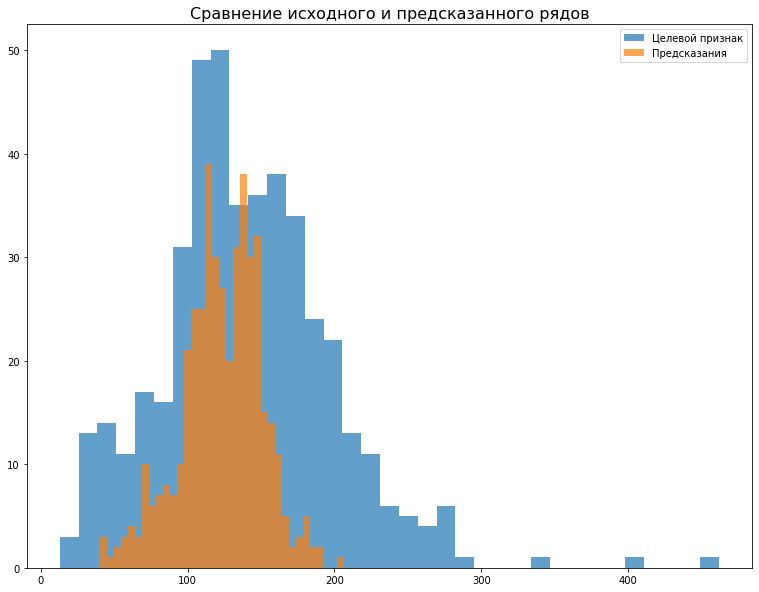

In [27]:
%%time
display ("CatBoostRegressor:",mean_squared_error(target_test, catboost_best.predict(features_test), squared=False))
plt.figure(figsize=(13, 10))
plt.hist(target_test, bins = 35, label = 'Целевой признак', stacked=True, alpha=0.7)
plt.hist(catboost_best.predict(features_test), bins = 35, label = 'Предсказания', stacked=True, alpha=0.7)
plt.legend()
plt.title('Сравнение исходного и предсказанного рядов', fontsize=16)

<div class="alert alert-info">
<font color='black'> <b> 
Проверим CatBoostRegressor на тестовой выборке. Результат стал хуже, но в пределах допустимого значения   </font> <b>

<div class="alert alert-block alert-info">
<b>Совет: </b> Финальные предсказания можно было визуализирвоать: графики исходного и предсказанных рядов.
<div class="alert alert-info"> <b>Комментарий студента:</b> Сделал. При тестовой выборке 10% менял гиперпараметры, но меньше полученного значения не выходит получить</div>
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка (ревью 2):</b> Можно увеличить количество лагов или объеденить треин и валидацию перед финальным тестированием (и переобучить модель).
<div class="alert alert-info"> <b>Комментарий студента:</b> Сделал! Увеличил число лагов. Есть предел увеличения? После определенного числа mse снова увеличится? Объясни чуть подробнее пожалуйста</div>
</div>

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Данные загружены и подготовлены
- [x]  Данные проанализированы
- [x]  Модель обучена, гиперпараметры подобраны
- [x]  Качество моделей проверено, выводы сделаны
- [x]  Значение *RMSE* на тестовой выборке не больше 48